# Evaluation Project - 6
# loan Application Status Prediction

### Problem Statement:  

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):- Loan_Status

### We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Business Problem :
Banking uses manual procedures to determine if a borrower is suitable for a loan based on the results. Manual procedures were mostly effective, but were not sufficient when there were a large number of loan applications. At that time, it can take a long time to make a decision. As a result, a machine learning model for loan forecasting can be used to assess customer loan status and build strategies.

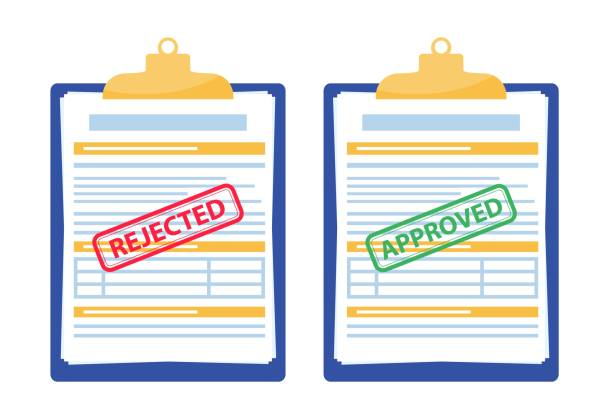

## Importing useful Libraries:

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## reading dataset:

In [2]:
# read the data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# checking the shape of the dataset
df.shape 

(614, 13)

###  Our Dataset has 614 Rows and 13 Columns

In [4]:
#lets check the info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### The input variables are a mixture of numerical and categorical or ordinal data types, 8 columns which are categorical and 5 numerical and Our target variable is Loan Status. The non-numerical columns are represented using strings. At a minimum, the categorical variables will need to be ordinal or one-hot encoded.

# Exploratory Data Analysis( EDA )

In [5]:
#Lets check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### In our Dataset columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History have missng values.

##  Data Imputation:

In [6]:
# Imputing missing values

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [7]:
# again Check for missing values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Now we don't have any null values in our dataset

In [8]:
# count of unique values in dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
# Trying for conversion from float to int :

df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Credit_History']=df['Credit_History'].astype('int')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int')

In [10]:
# let's see loan status as per Credit History
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,95,44,139
1,97,378,475
All,192,422,614


### Application with credit history of 1 are more eligible for loan.

In [11]:
# value count of target variable
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

###  Our Dataset is imbalanced. We will overcome this later.

In [12]:
# let's check duplicate values
df.duplicated().sum()

0

### No duplicate value in our dataset.

In [13]:
#value count of "Dependent" Column
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Our Model will not be feasible with 3+, so, we will replace it with 4

In [14]:
# Replacing 3+ with 4 
df=df.replace(to_replace='3+', value=4)

In [15]:
# Drop ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

In [16]:
# Dataset Statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.412162,342.000000,0.773616
std,6109.041673,2926.24876,84.037468,64.372489,0.418832
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


## EDA Conclusion:
1.Target Variable is imbalanced with 422 yes and 192 No value count.

2.Applicant income ranges between 150 and 81000.

3.Loan amount is between 9 and 700.

4.Dataset columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History had missng values,we 
imputed them with their respective mode and mean.

5.Applicants with credit history of 1 are more eligible for loan.

6.The categorical variables will need to be ordinal or one-hot encoded.

# Data Visualization:

In [17]:
# grouping categorical columns
cat_cols = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num_cols = [y for y in df.columns if df[y].dtypes!='O']

### Univariate Analysis:

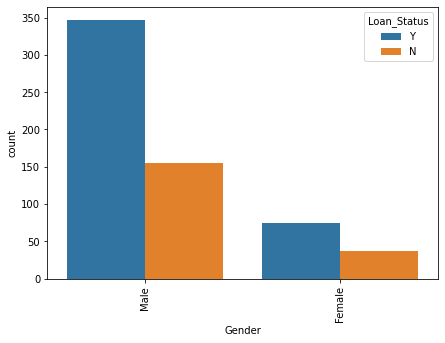

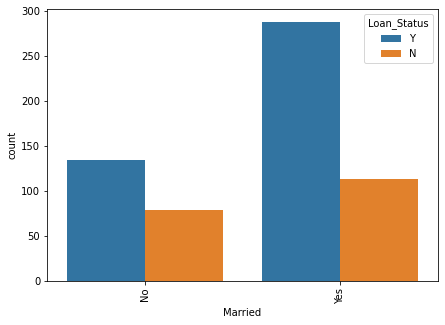

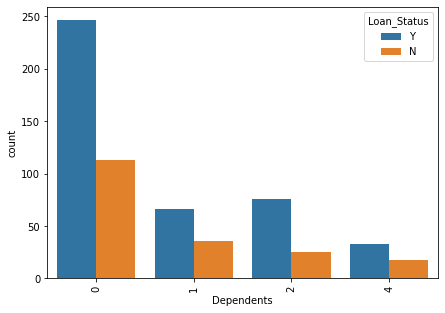

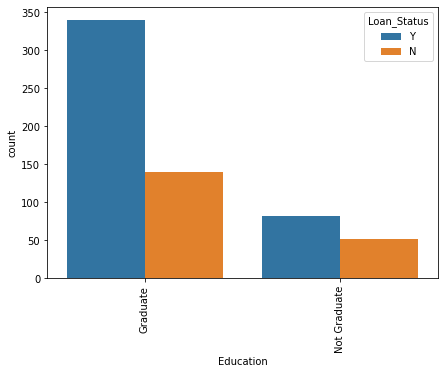

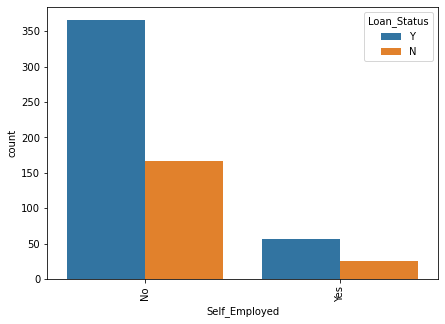

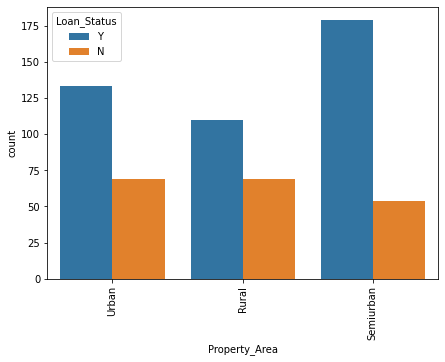

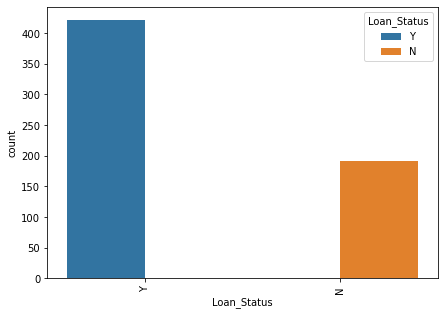

In [19]:
for i in df[cat_cols]:
    plt.figure(figsize=(7,5))
    chart = sns.countplot(x=i,data=df,hue='Loan_Status')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Observations:

1.More number of males have applied for loan than females.

2.More number of "married" people have applied for loan than females.

3.More number of "Graduate" people have applied for loan.

4.More number of people "Semiurban" and "Urban" area have applied for loan.

5.Maximum number of "self employed" people have applied for loan.

6.Maximum people who are "Not self employed", who have applied for loan, loan approval is almost equal for both the cases.

7.In most of the cases if the person is educated the loan is being approved.

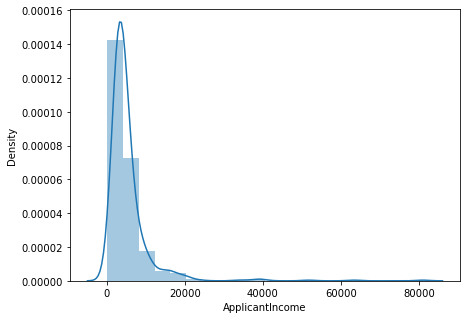

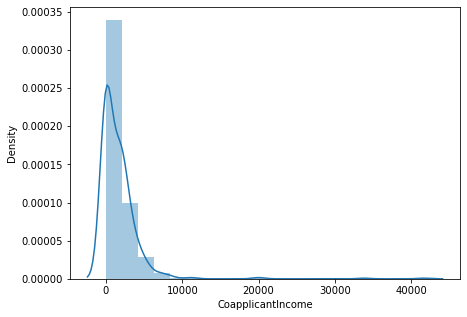

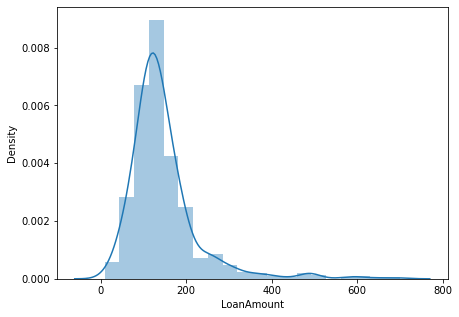

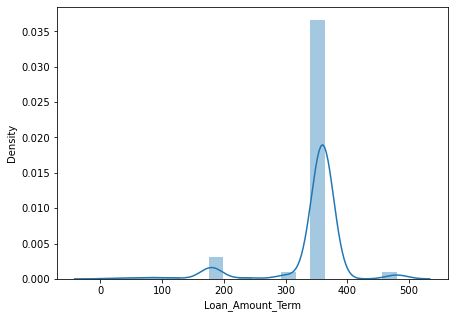

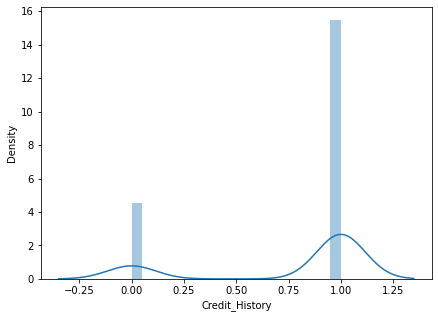

In [20]:
# plotting distplot to check the distributions of each numerical category feature

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,bins = 20,kde=True)
    plt.show()

### Observations:-
1.Most of the applicant prefer to have 360 Term plan for loan.

2.Married female has higher chance for loan approval.

3.The data is not normally distributed and most of the data is skewed.

## Bivariate Analysis:

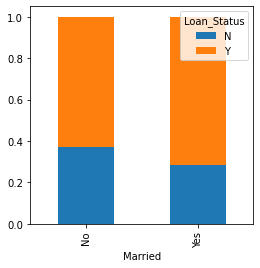

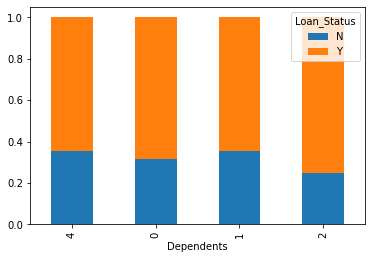

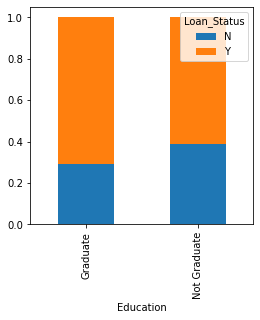

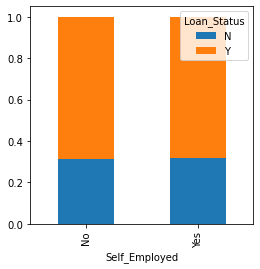

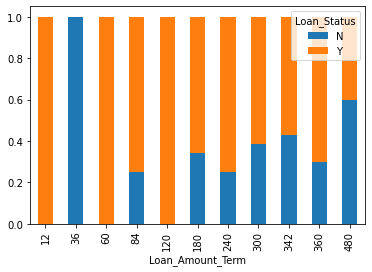

In [23]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
ct = pd.crosstab(df.Loan_Amount_Term,df.Loan_Status,normalize='index')

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

ct.plot.bar(stacked=True)
plt.show()

## Observation -
1.Married female has higher chance for loan approval.

2.No. of dependents and Self Employed doesn't effect the Loan Status.

3.Graduate has little higher chances for Loan Approval.

4.36 Loan terms willface mostly rejection, whereas having 12 and 120 Loan term has a great chance for Loan approval. 36 Loan terms will face mostly rejection.

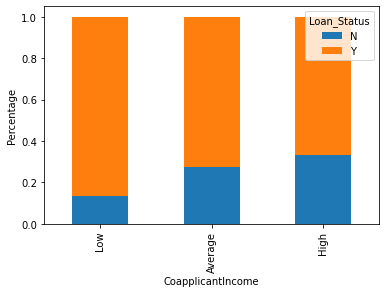

In [25]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

### Coapplicant with High Income has higher Chances for Loan Approval.

# Removing Outlier:

In [26]:
from scipy.stats import zscore
z_score = zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis =1)
new_df = df[filtering_entry]

In [27]:
# Loss of data
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0]*100)

shape before         : (614, 13)
shape after          : (577, 13)
Percentage Loss      : 6.026058631921824


### Percentage Loss :Only  6% data will loss after applying Zscore technique, so we will use this method to remove outlier.

In [28]:
df = new_df

## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)

df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_Income_bin
0,1,0,0,0,0,5849,0,146.412162,360,1,2,1,NaN
1,1,1,1,0,0,4583,1508,128.000000,360,1,0,0,Average
2,1,1,0,0,1,3000,0,66.000000,360,1,2,1,NaN
3,1,1,0,1,0,2583,2358,120.000000,360,1,2,1,Average
4,1,0,0,0,0,6000,0,141.000000,360,1,2,1,NaN


In [30]:
#drop Coapplicant Income Bin column
df.drop(["Coapplicant_Income_bin"],axis=1,inplace= True)

##  Checking Skewness:

In [31]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### ApplicantIncome- non categorical CoapplicantIncome- non categorical Loan_Amount_Term- non categorical Credit_History- non categorical Loan_Status-Target column

### Rest features are continious feature, so skewness need not be treated.

In [32]:
#Removing skewness
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df['ApplicantIncome'] = scaler.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['CoapplicantIncome'] = scaler.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
df['LoanAmount'] = scaler.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term'] = scaler.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History'] = scaler.fit_transform(df['Credit_History'].values.reshape(-1,1))
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.500252
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191870
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## correlation using heatmap:

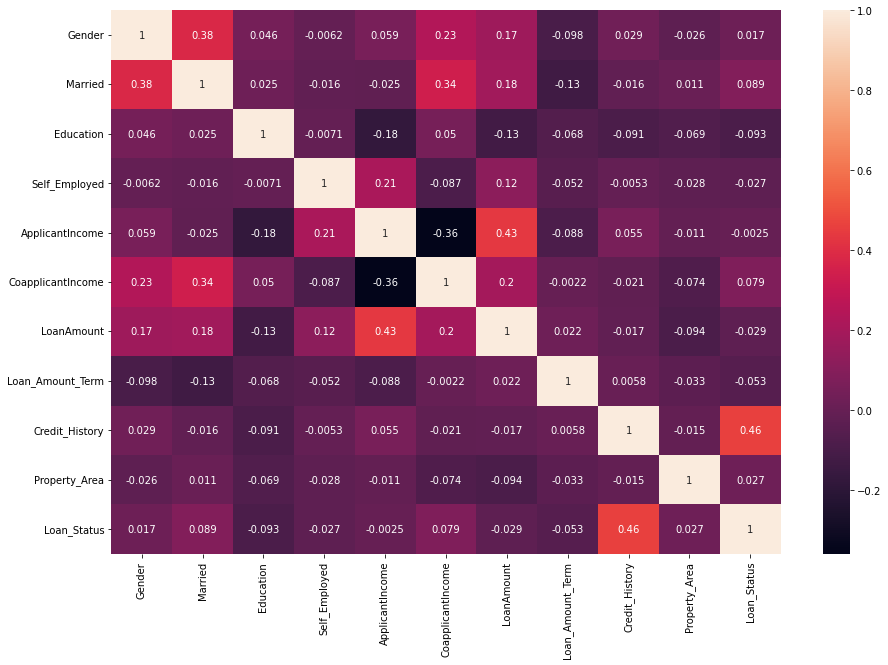

In [34]:
# let's check corelation in heat map
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

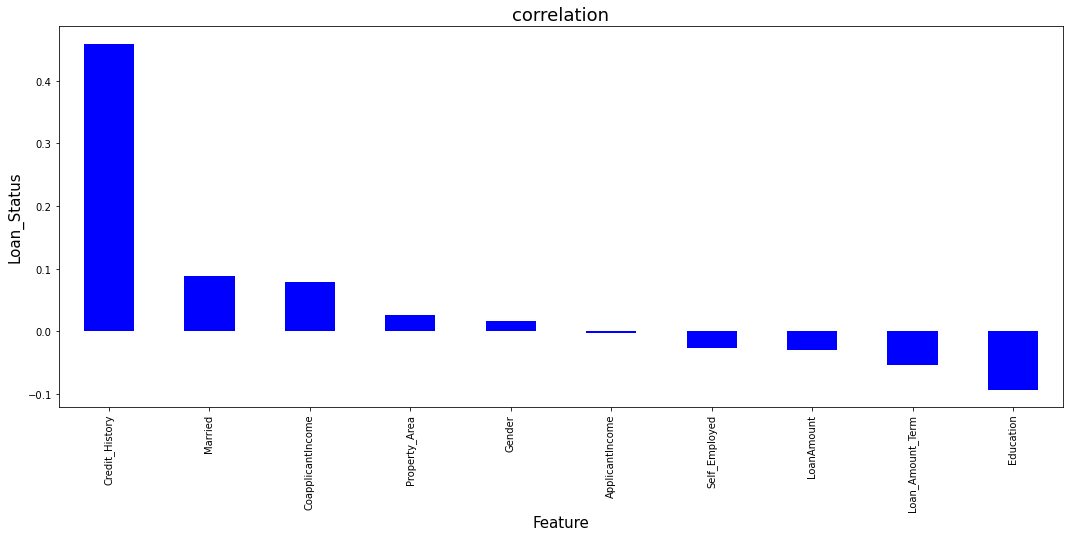

In [37]:
plt.figure(figsize=(18,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'b')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Loan_Status', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

### None of the columns have very good correlation with our target ,column except Credit_History

# Preprocessing Pipeline:

## SMOTE :

In [38]:
# Spliting dataset into Features and Labels 
y = df['Loan_Status']
X = df.drop(columns = ['Loan_Status'])

In [39]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

### using SMOTE , We overcome imbalance .

# Data Standardization:

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model building:

In [44]:
# find the best random state

from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.30,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.7907949790794979 on Random_state 10


In [45]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

# 1. Logistic Regression:

In [46]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7907949790794979
[[ 80  31]
 [ 19 109]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       111
           1       0.78      0.85      0.81       128

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



# 2. Decision Tree Classifier:

In [47]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt = DT.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.698744769874477
[[83 28]
 [44 84]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       111
           1       0.75      0.66      0.70       128

    accuracy                           0.70       239
   macro avg       0.70      0.70      0.70       239
weighted avg       0.71      0.70      0.70       239



# 3. Random Forest Classifier:

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7698744769874477
[[ 82  29]
 [ 26 102]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       111
           1       0.78      0.80      0.79       128

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



# 4.SVC

In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7573221757322176
[[ 73  38]
 [ 20 108]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       111
           1       0.74      0.84      0.79       128

    accuracy                           0.76       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.76      0.76      0.75       239



# Cross Validation Score:

In [50]:
from sklearn.model_selection import cross_val_score

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of LogisticRegression model :", rwr.mean())

rwr=cross_val_score(DT, X, y, cv=5)
print("Cross validation score of DecisionTree model :", rwr.mean())

rwr=cross_val_score(rf, X, y, cv=5)
print("Cross validation score of RandomForest model :", rwr.mean())

rwr=cross_val_score(LR, X, y, cv=5)
print("Cross validation score of SVC model :", rwr.mean())

Cross validation score of LogisticRegression model : 0.7248899371069182
Cross validation score of DecisionTree model : 0.7073034591194969
Cross validation score of RandomForest model : 0.7764229559748428
Cross validation score of SVC model : 0.7248899371069182


###  RandomForest model is proved to be the best model, checking ROC score to select the best model.

## AUC and ROC Curve:

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [52]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All models are trained")

All models are trained


In [53]:
LR.score(x_test,y_test)
DT.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)
print("ROC AUC Score of LogisticRegression model :", roc_auc_score(y_test,LR.predict(x_test)))
print("ROC AUC Score of DecisionTree model :", roc_auc_score(y_test,DT.predict(x_test)))
print("ROC AUC Score of  RandomForest model :", roc_auc_score(y_test,rf.predict(x_test)))
print("Cross validation score of SVC model :", roc_auc_score(y_test,svc.predict(x_test)))

ROC AUC Score of LogisticRegression model : 0.7861416103603603
ROC AUC Score of DecisionTree model : 0.7071016328828829
ROC AUC Score of  RandomForest model : 0.7711148648648648
Cross validation score of SVC model : 0.7507038288288288


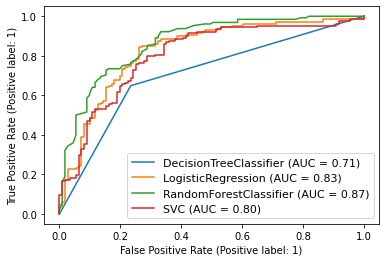

In [54]:
# Graph

disp=plot_roc_curve(DT,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

### Above graph shows, RandomForest model is the best model.

# HyperParameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [200, 800], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [4,5,6,7,8],
              'criterion': ['gini','entropy']}

In [56]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [58]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [59]:
#Let's train and test our model using best parameters

model=RandomForestClassifier(criterion= 'entropy',
 max_depth= 8,
 max_features= 'auto',
 n_estimators= 200)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred)*100)


print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,predrf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("---------------------------------------------------")

78.66108786610879
Accuracy Score: 78.66108786610879%
---------------------------------------------------
roc_auc_score: 76.78068693693693%
---------------------------------------------------
Confusion Matrix : 
 [[ 78  33]
 [ 18 110]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       111
           1       0.77      0.86      0.81       128

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.79      0.78       239

---------------------------------------------------


# ROC curve 

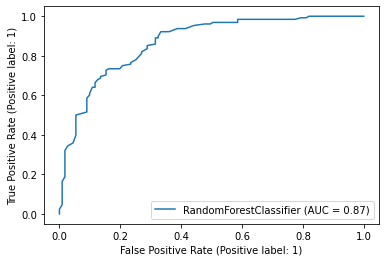

In [60]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(rf, x_test, y_test)
plt.show()

### we've improved the model's accuracy score as well as performance (AUC) by adjusting hyperparameters.

# Saving the Model:

In [61]:
import joblib
joblib.dump(model,"Loan Application Status.pkl")

['Loan Application Status.pkl']

# Loading the Model:

In [62]:
Model = joblib.load("Loan Application Status.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
234,0,0
235,1,1
236,0,1
237,0,0


### We achieved the objective of this project to build a model which predicts whether the applicant's loan will be approved or rejected. Based on customer details like, Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others, our model will identify the customers segments, those are eligible for loan amount.